In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2020-09-24  10745.548828
1    2020-09-25  10702.290039
2    2020-09-26  10754.437500
3    2020-09-27  10774.426758
4    2020-09-28  10721.327148
..          ...           ...
361  2021-09-20  42843.800781
362  2021-09-21  40693.675781
363  2021-09-22  43574.507813
364  2021-09-23  44895.097656
365  2021-09-24  41959.917969

[366 rows x 2 columns]


In [ ]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-09-24
1   2020-09-25
2   2020-09-26
3   2020-09-27
4   2020-09-28
..         ...
726 2022-09-20
727 2022-09-21
728 2022-09-22
729 2022-09-23
730 2022-09-24

[731 rows x 1 columns]


In [ ]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-03-09,82486.881524,55145.508614,115909.703638
532,2022-03-10,82683.008066,55220.019490,117341.742595
533,2022-03-11,82998.332441,53636.759280,117467.748414
534,2022-03-12,83351.924695,54399.887980,118377.832866
535,2022-03-13,83440.070590,54951.231018,118359.347583
...,...,...,...,...
726,2022-09-20,120496.584012,29450.130231,232521.623620
727,2022-09-21,120883.375924,30492.651708,230969.212671
728,2022-09-22,121079.502466,29178.606808,235769.876879
729,2022-09-23,121394.826841,28539.020934,234889.173451


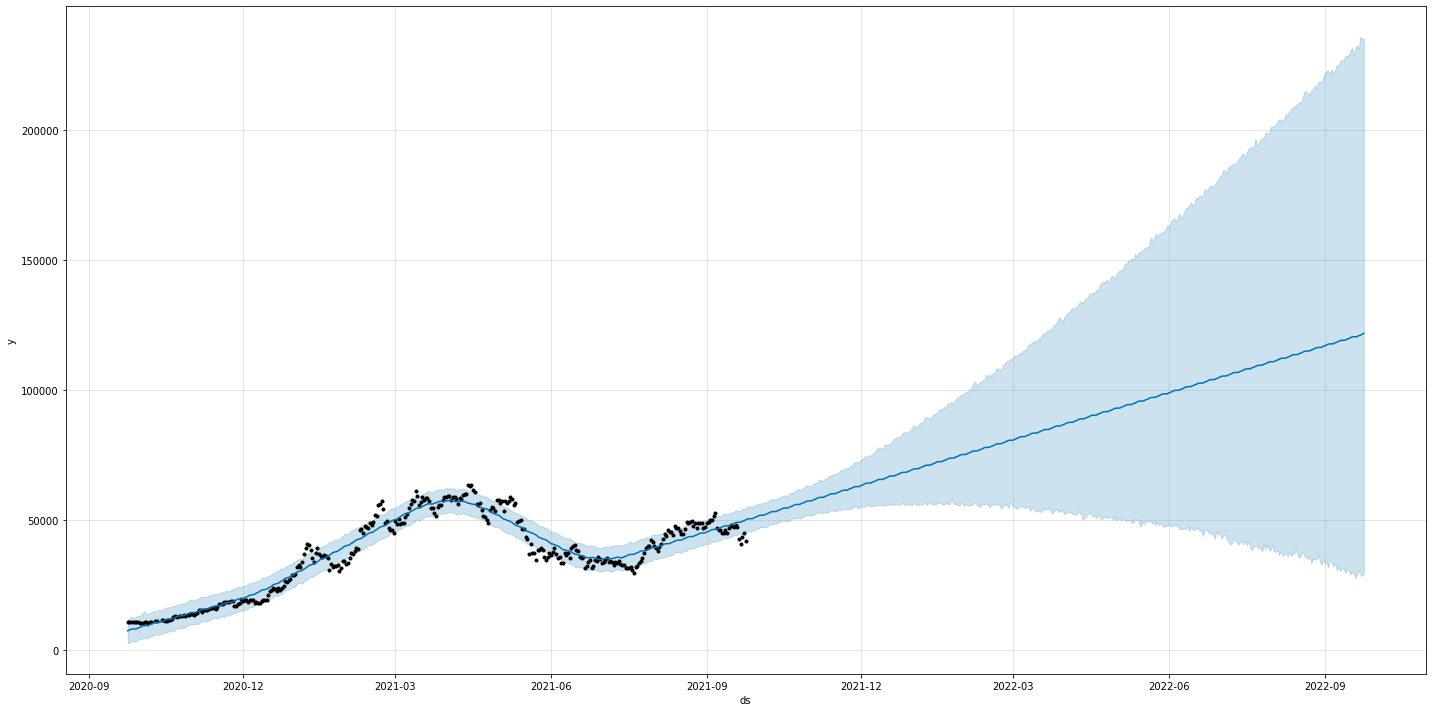

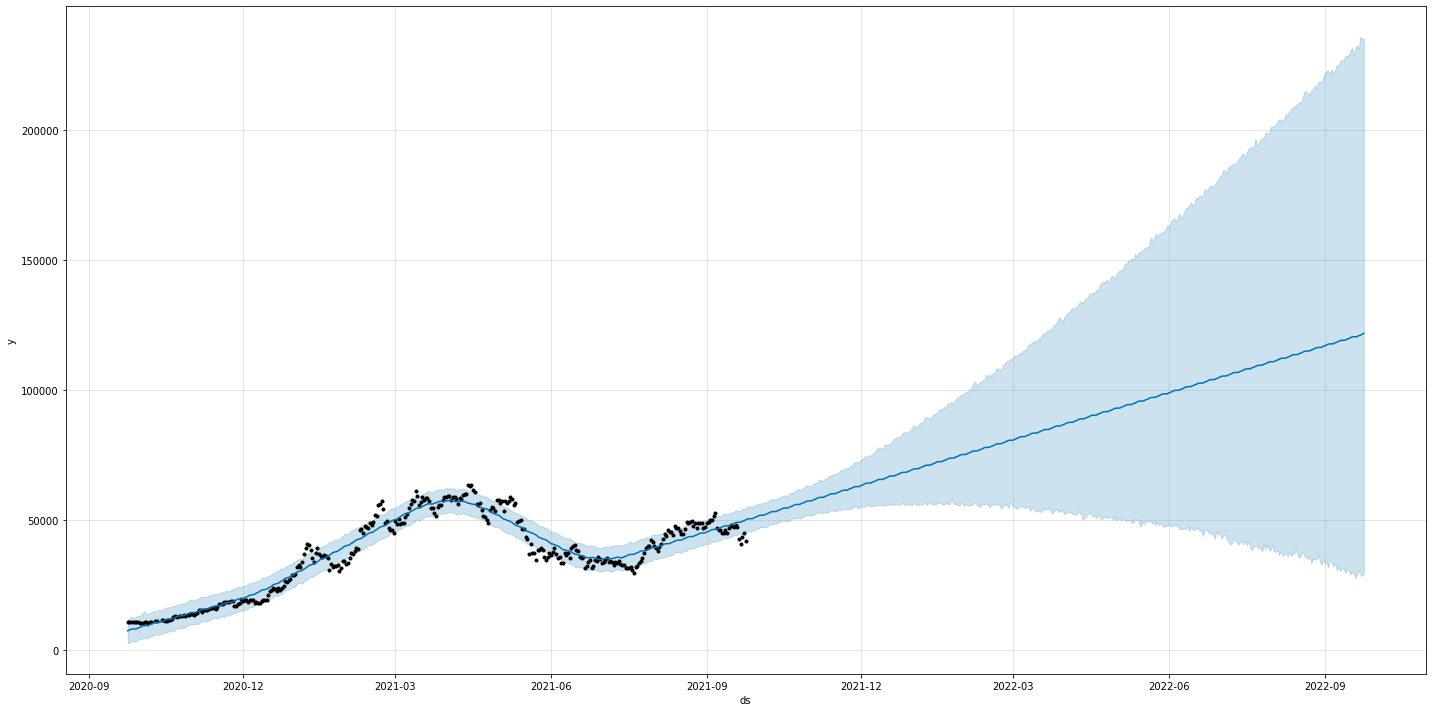

In [ ]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))